In [1]:
import librosa
import soundfile as sf
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

In [2]:
audio_file_path="/content/7061-6-0-0.wav"
#ses dosyası dijital hale getirilir
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [3]:
#1. şeçenek
# Ses dosyasının teknik bilgilerini al
with sf.SoundFile("/content/7061-6-0-0.wav") as f:
    channels = f.channels
    samplerate = f.samplerate
    duration = len(f) / samplerate
    print(f"Kanal sayısı: {channels}")
    print(f"Örnekleme oranı (Hz): {samplerate}")
    print(f"Süre (saniye): {duration:.2f}")


Kanal sayısı: 2
Örnekleme oranı (Hz): 44100
Süre (saniye): 2.25


In [4]:
#değişken türlerini ve şekillerini gösterir
print(f"\n'librosa_audio_data' değişkeninin tipi: {type(librosa_audio_data)}")
print(f"'librosa_audio_data' değişkeninin şekli: {librosa_audio_data.shape}")
print(f"'librosa_sample_rate' değişkeninin tipi: {type(librosa_sample_rate)}")


'librosa_audio_data' değişkeninin tipi: <class 'numpy.ndarray'>
'librosa_audio_data' değişkeninin şekli: (49613,)
'librosa_sample_rate' değişkeninin tipi: <class 'int'>


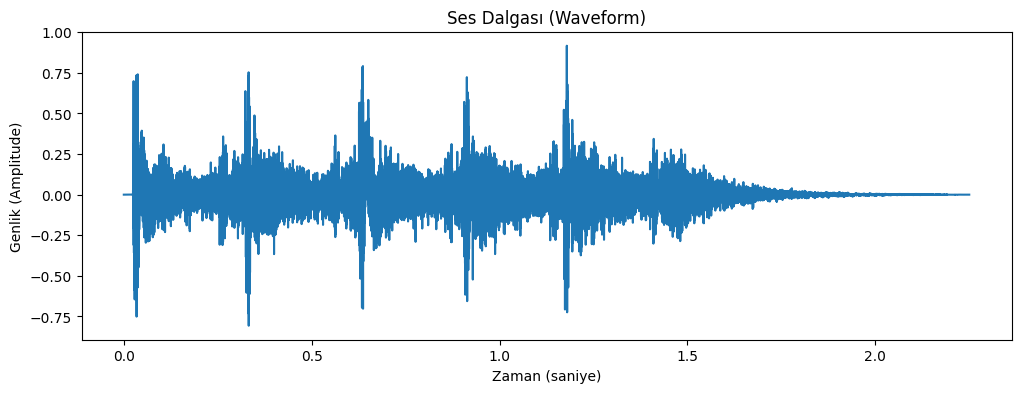

In [5]:
#2.seçenek
time = np.linspace(0, len(librosa_audio_data)/librosa_sample_rate, len(librosa_audio_data))
plt.figure(figsize=(12,4))
plt.plot(time, librosa_audio_data)
plt.xlabel("Zaman (saniye)")
plt.ylabel("Genlik (Amplitude)")
plt.title("Ses Dalgası (Waveform)")
plt.show()

In [7]:
Audio("/content/7061-6-0-0.wav")

In [8]:
#3. seçenek
files = {
    "gun shot": "/content/7061-6-0-0.wav",
    "dog_bark": "/content/344-3-0-0.wav",
    "engine_idling": "/content/6988-5-0-0.wav",
    "street_musıc": "/content/14780-9-0-0.wav"
}


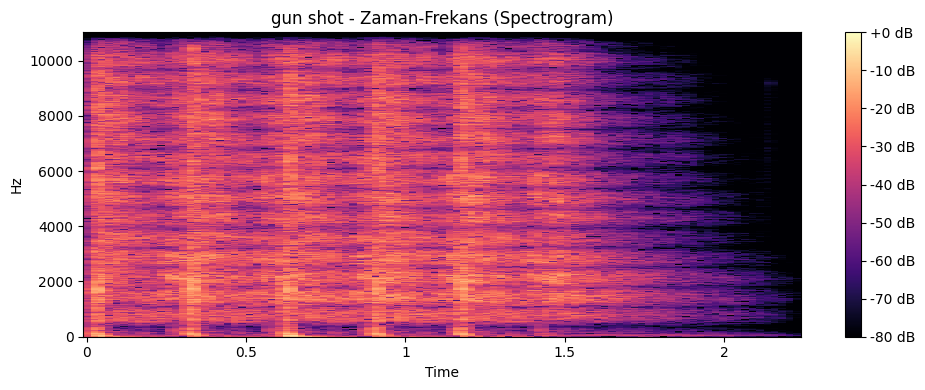


gun shot sesinde, frekans yoğunlukları sesin türüne göre farklılık göstermektedir.



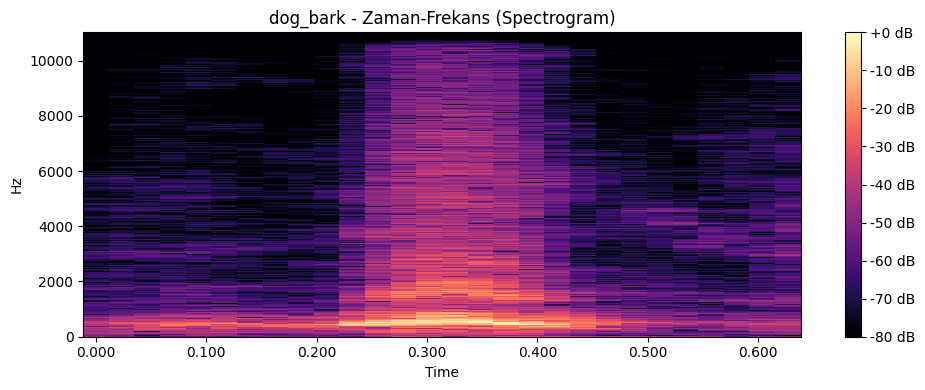


dog_bark sesinde, frekans yoğunlukları sesin türüne göre farklılık göstermektedir.



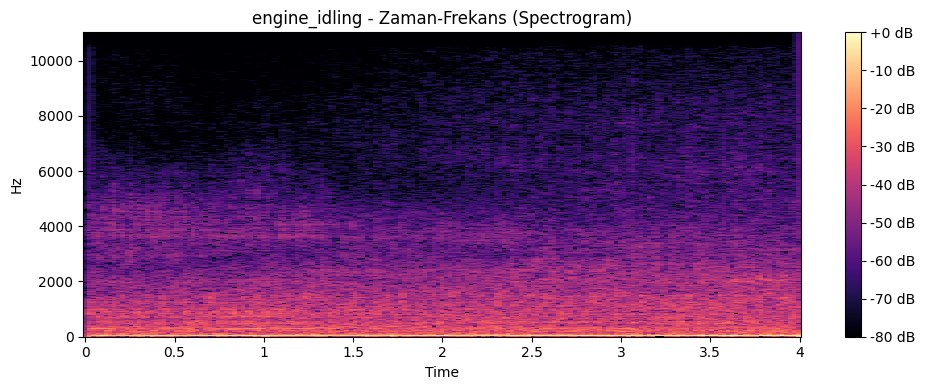


engine_idling sesinde, frekans yoğunlukları sesin türüne göre farklılık göstermektedir.



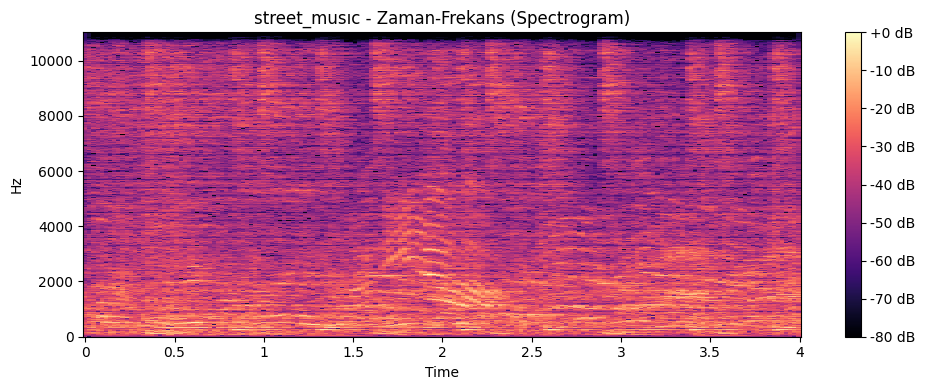


street_musıc sesinde, frekans yoğunlukları sesin türüne göre farklılık göstermektedir.



In [9]:
for label, path in files.items():
   # Ses dosyasını yükleme
    y, sr = librosa.load(path)
    # Spectrogram hesaplama
    D = np.abs(librosa.stft(y))
    D_db = librosa.amplitude_to_db(D, ref=np.max)
    # Görselleştirme
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(D_db, sr=sr, x_axis='time', y_axis='hz', cmap='magma')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"{label} - Zaman-Frekans (Spectrogram)")
    plt.tight_layout()
    plt.show()
     # Ses dosyasını çal
    display(Audio(y, rate=sr))
    print(f"\n{label} sesinde, frekans yoğunlukları sesin türüne göre farklılık göstermektedir.\n")

In [10]:
#5.seçenek
audio_file_path = "/content/7061-6-0-0.wav"
y, sr = librosa.load(audio_file_path, sr=None)  # sr=None: orijinal örnekleme oranını korur


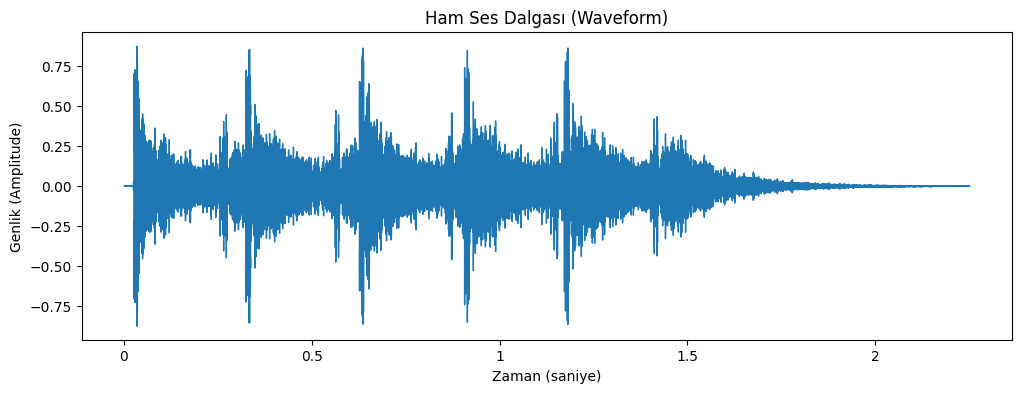

In [11]:
#  Ham ses dalga formunu görselleştirme
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Ham Ses Dalgası (Waveform)")
plt.xlabel("Zaman (saniye)")
plt.ylabel("Genlik (Amplitude)")
plt.show()


In [12]:
#  Aynı ses dosyasını dinle
from IPython.display import Audio
Audio(y, rate=sr)

In [13]:
# Mel-Spektrogram hesapla
mels = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

In [14]:
#  dB (logaritmik) ölçeğe dönüştür
mels_db = librosa.power_to_db(mels, ref=np.max)

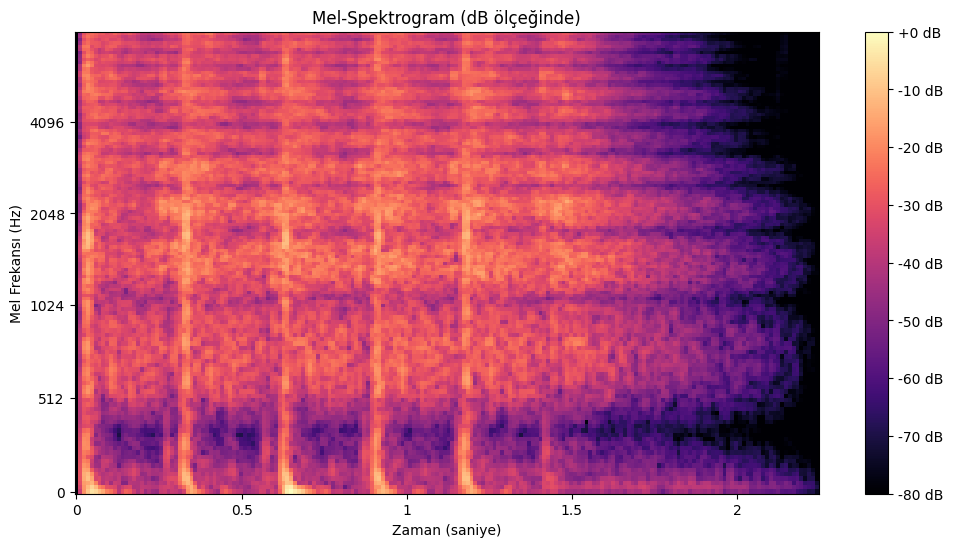

In [15]:
#  Mel-spektrogramı görselleştir
plt.figure(figsize=(12, 6))
librosa.display.specshow(mels_db, sr=sr, x_axis='time', y_axis='mel', fmax=8000, cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel-Spektrogram (dB ölçeğinde)")
plt.xlabel("Zaman (saniye)")
plt.ylabel("Mel Frekansı (Hz)")
plt.show()

In [16]:
#  Öznitelik matrisinin temel bilgilerini yazdır
print("🔹 Mel-spektrogram boyutu:", mels_db.shape)
print("🔹 Ortalama enerji (dB):", np.mean(mels_db))
print("🔹 Maksimum enerji (dB):", np.max(mels_db))
print("🔹 Minimum enerji (dB):", np.min(mels_db))

🔹 Mel-spektrogram boyutu: (128, 194)
🔹 Ortalama enerji (dB): -40.80991
🔹 Maksimum enerji (dB): 0.0
🔹 Minimum enerji (dB): -80.0
